<a href="https://colab.research.google.com/github/caiom26/AnaliseDeDados/blob/main/Tennis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns


Meu objetivo com esse dataframe é saber a probabilidade de ser hábil de jogar tenis sabendo as condições climáticas

In [24]:
df=pd.read_csv('tennis.csv')
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


Primeiramente quero entender quais os valores em cada uma das colunas

In [25]:
def print_unique_values_all_columns(df):
    """
    Imprime os valores únicos de todas as colunas de um DataFrame.

    Parâmetros:
    df : DataFrame
        O DataFrame cujos valores únicos serão exibidos.
    """
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Coluna: {column}")
        print(f"Valores únicos: {unique_values}")
        print("-" * 50)


In [26]:
print_unique_values_all_columns(df)

Coluna: day
Valores únicos: ['D1' 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'D8' 'D9' 'D10' 'D11' 'D12' 'D13'
 'D14']
--------------------------------------------------
Coluna: outlook
Valores únicos: ['Sunny' 'Overcast' 'Rain']
--------------------------------------------------
Coluna: temp
Valores únicos: ['Hot' 'Mild' 'Cool']
--------------------------------------------------
Coluna: humidity
Valores únicos: ['High' 'Normal']
--------------------------------------------------
Coluna: wind
Valores únicos: ['Weak' 'Strong']
--------------------------------------------------
Coluna: play
Valores únicos: ['No' 'Yes']
--------------------------------------------------


Primeiramente, droparemos a primeira coluna pois trata-se apenas de uma nomenclatura.

In [27]:
df=df.drop('day',axis=1)

In [28]:
df.head()

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


Como temos apenas variáves categóricas nesse DF, teremos de transformar as colunas em variáveis numéricas, para isso utilizaremos um Label Encoder

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
Encoder=LabelEncoder()

In [31]:
dfnew=df.apply(Encoder.fit_transform)
dfnew.head()

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [32]:
df.head()

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [13]:
df.head()

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


Observação: criamos um dataframe novo para sabermos o significado de cada número.
Agora Utilizaremos inicialmente o modelo de RainForest Classifier para Classificação de nosso modelo


In [33]:
y=dfnew['play']
X=dfnew.drop('play',axis=1)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
RFClass=RandomForestClassifier()

In [39]:
RFClass.fit(X_train,y_train)

RandomForestClassifier()

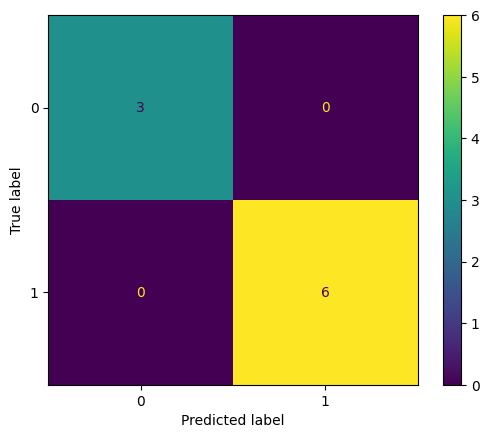

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_train, RFClass.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Agora quero entender quais as variáveis mais importantes para meu modelo


In [41]:
# Obtendo a importância das variáveis
importances = RFClass.feature_importances_

# Criando um DataFrame para exibir as variáveis e suas importâncias
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Exibindo as variáveis mais importantes
print(feature_importances)

    Feature  Importance
2  humidity    0.358640
3      wind    0.236744
0   outlook    0.206652
1      temp    0.197964


Portanto podemos deduzir que a variável mais importante para sabermos se haverá possibilidade de jogo nas situações descritas é a humidade.